Experiments to classify entropy, noise, other characteristics of QRNG vs PRNG datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from modules.feature_extraction_functions import *
from modules.data_preprocessing import *

In [9]:
data = pd.read_csv('data/IBM_Superposition_QRNG_100qubit_large.txt', names=['binary_number', 'quantum', 'QPU'], sep=' ')
df_QPU = data[data['quantum'] == 'quantum']
df_QPU.reset_index(inplace=True)
df_QPU = df_QPU.drop('index', axis=1)

df_QPU

,binary_string,quantum,QPU
0,1011001111011110101101000100010011001010110000...,quantum,ibm_brisbane
1,0011111010111000011001001000110100101000101100...,quantum,ibm_brisbane
2,1111001100100100001110110101101101000100000010...,quantum,ibm_brisbane
3,0000110100111010000011000011110101010001000000...,quantum,ibm_brisbane
4,0101111101001110011100100101110001101101001011...,quantum,ibm_brisbane
...,...,...,...
399995,1100101011110111000101001100100110010000010100...,quantum,ibm_kyiv
399996,1110001110111101010011001110110110110001011001...,quantum,ibm_kyiv
399997,0100011001001001101111110000010001100110100010...,quantum,ibm_kyiv
399998,1000100001011011100010110101100101101101110111...,quantum,ibm_kyiv


In [10]:
# Step 1: get 1 and 0 counts for each qubit (100 qubit QRNG circuit).
# Since it's binary data, getting the counts of all 1s will give us a distribution of 1s and 0s

qubit_one_counts = [0] * 100

for binary_string in quantum_data['binary_number']:
    for i in range(100):
        if binary_string[i] == '1':
            qubit_one_counts[i] += 1

qubit_one_counts

NameError: name 'quantum_data' is not defined

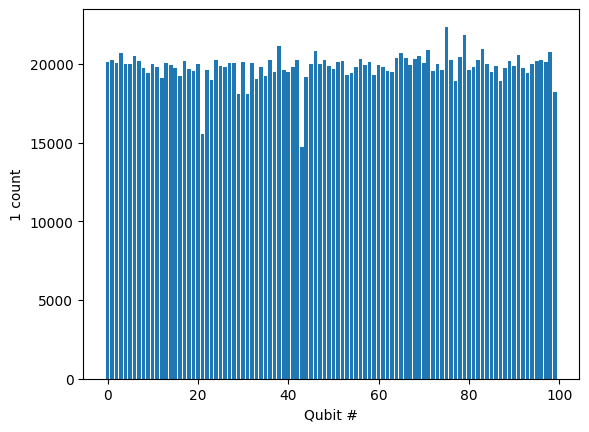

<Figure size 3000x1500 with 0 Axes>

In [ ]:
x = [i for i in range(100)]

plt.bar(x, height=qubit_one_counts)

plt.xlabel('Qubit #')
plt.ylabel('1 count')

plt.figure(figsize=(30, 15))

plt.show()

Baseline entropy measurements for QRNG vs PRNG data (treating all QPUs as 1 label)

Shannon Entropy:

In [20]:
#Loading of data in proper format: 

data = pd.read_csv('data/IBM_Superposition_QRNG_100qubit_large.txt', names=['binary_number', 'quantum', 'QPU'], sep=' ')
df_QRNG = data[data['quantum'] == 'quantum']
df_QRNG.reset_index(inplace=True)
df_QRNG = df_QRNG.drop('index', axis=1)
                     
df_PRNG = data[data['quantum'] == 'non-quantum']
df_PRNG.reset_index(inplace=True)
df_PRNG = df_PRNG.drop('index', axis=1)

df_QRNG

,binary_number,quantum,QPU
0,1011001111011110101101000100010011001010110000...,quantum,ibm_brisbane
1,0011111010111000011001001000110100101000101100...,quantum,ibm_brisbane
2,1111001100100100001110110101101101000100000010...,quantum,ibm_brisbane
3,0000110100111010000011000011110101010001000000...,quantum,ibm_brisbane
4,0101111101001110011100100101110001101101001011...,quantum,ibm_brisbane
...,...,...,...
399995,1100101011110111000101001100100110010000010100...,quantum,ibm_kyiv
399996,1110001110111101010011001110110110110001011001...,quantum,ibm_kyiv
399997,0100011001001001101111110000010001100110100010...,quantum,ibm_kyiv
399998,1000100001011011100010110101100101101101110111...,quantum,ibm_kyiv


In [ ]:
# Find entropy for input strings from 100 - 10000, chunk size 1 - 10 to evaluate differences
# Choose random entry

chunk_sizes = [1, 2, 4, 5, 10, 20]
num_concats_sizes = [1, 10, 20, 40, 50, 100, 200]

for num_concats in num_concats_sizes:   #Number of conacts (baseline string length is 100)
    for chunk_size in chunk_sizes: 
        cur_df_QRNG = concatenate_data(df_QRNG, num_concats)
        cur_df_PRNG = concatenate_data(df_PRNG, num_concats)

        input_string_QRNG = cur_df_QRNG.sample(1).iloc[0][0]
        input_string_PRNG = cur_df_PRNG.sample(1).iloc[0][0]

        QRNG_entropy = shannon_entropy(input_string_QRNG, '01', chunk_size)
        PRNG_entropy = shannon_entropy(input_string_PRNG, '01', chunk_size)

        print(f'Entropy for input length = {100*num_concats} and chunk size = {chunk_size}:\nQRNG:{QRNG_entropy}\nPRNG:{PRNG_entropy}\n\n')

**On first glance, the Shannon entropy seems pretty random even for larger input lengths and chunk sizes - no apparent difference between PRNG and QRNG**

To confirm our results, we will perform randomized trials on what should theoretically yield high non-trivial entropy - input length 100000 bit strings with chunk size of 1, 2, 5, 10, 20. For each trial, we will take the average of 20 random index selections to avoid random sampling error.

In [21]:
Concatenated_QRNG = concatenate_data(df_QRNG, 1000)
Concatenated_PRNG = concatenate_data(df_PRNG, 1000)
for chunk_size in [1, 2, 5, 10]:
    QRNG_entropies = []
    PRNG_entropies = []
    random_sample_QRNG = Concatenated_QRNG.sample(20)
    random_sample_PRNG = Concatenated_QRNG.sample(20)
    for i in range(20):
        QRNG_string = random_sample_QRNG.iloc[i][0]
        PRNG_string = random_sample_PRNG.iloc[i][0]
        QRNG_entropies.append(shannon_entropy(QRNG_string, '10', chunk_size))
        PRNG_entropies.append(shannon_entropy(PRNG_string, '10', chunk_size))
    QRNG_entropy = sum(QRNG_entropies) / len(QRNG_entropies)
    PRNG_entropy = sum(PRNG_entropies) / len(PRNG_entropies)
    print(f'For chunk size = {chunk_size} and input length = 100000, the average QRNG entropy = {QRNG_entropy} and the average PRNG entropy = {PRNG_entropy}\n\n')


/var/folders/kj/xbj7kgl124b7r16_d8j8zsww0000gn/T/ipykernel_82092/2195505110.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  QRNG_string = random_sample_QRNG.iloc[i][0]
/var/folders/kj/xbj7kgl124b7r16_d8j8zsww0000gn/T/ipykernel_82092/2195505110.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  PRNG_string = random_sample_PRNG.iloc[i][0]


For chunk size = 1 and input length = 100000, the average QRNG entropy = 0.9998347304940454 and the average PRNG entropy = 0.9998325782853069


For chunk size = 2 and input length = 100000, the average QRNG entropy = 1.999670894654929 and the average PRNG entropy = 1.9996494082728453


For chunk size = 5 and input length = 100000, the average QRNG entropy = 4.997931158316204 and the average PRNG entropy = 4.997859685886725


For chunk size = 10 and input length = 100000, the average QRNG entropy = 9.92188289205087 and the average PRNG entropy = 9.921901372608428




The final entropy test we will perform is to measure entropy for groupings of every 100th bit - in other words, find the entropy of each individual device qubit's measurements and check for differences (all datasets we are using are generated from 100 qubit IBM circuits).

In [22]:
# To do this we will extract the data from the existing dataframes 
# (without concatenation) to create large input strings for each 
# individual qubit, similar to how we extract features for each qubit
# in the model building notebook.

qb_measurements = [[] for _ in range(100)]

for row in range(len(df_QRNG)):
    binary_string = df_QRNG.iloc[row][0]
    for count, meas in enumerate(binary_string):
        qb_measurements[count].append(meas)

for count, entry in enumerate(qb_measurements):
    qb_string = ''.join(entry)
    entropy = shannon_entropy(qb_string, '10', 5)
    print(f'qubit {count} entropy: {entropy}')

/var/folders/kj/xbj7kgl124b7r16_d8j8zsww0000gn/T/ipykernel_82092/3541382400.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  binary_string = df_QRNG.iloc[row][0]


qubit 0 entropy: 4.998881114849497
qubit 1 entropy: 4.999642326267536
qubit 2 entropy: 4.99955479137855
qubit 3 entropy: 4.999663093659567
qubit 4 entropy: 4.999146426857126
qubit 5 entropy: 4.9997086823696995
qubit 6 entropy: 4.999049930293405
qubit 7 entropy: 4.99927445162009
qubit 8 entropy: 4.998583539197197
qubit 9 entropy: 4.996991106812206
qubit 10 entropy: 4.999728800026849
qubit 11 entropy: 4.998402818749085
qubit 12 entropy: 4.988031440710408
qubit 13 entropy: 4.999537467018678
qubit 14 entropy: 4.999542033656393
qubit 15 entropy: 4.998876565137906
qubit 16 entropy: 4.998138280052424
qubit 17 entropy: 4.998564629663232
qubit 18 entropy: 4.999091294889859
qubit 19 entropy: 4.990622268601436
qubit 20 entropy: 4.9994798061682655
qubit 21 entropy: 4.999583783488863
qubit 22 entropy: 4.996999645888314
qubit 23 entropy: 4.990794618463553
qubit 24 entropy: 4.9997446785338235
qubit 25 entropy: 4.999200448395679
qubit 26 entropy: 4.999462197569888
qubit 27 entropy: 4.9987239780537776
